In [171]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [172]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_features_df = application_df.drop(columns=['EIN', 'NAME'])
app_features_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [173]:
# Determine the number of unique values in each column.
app_features_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [174]:
# If we only wanted to look at the unique values for the columns with an object datatype
app_features_df[app_features_df.dtypes[app_features_df.dtypes == 'object'].index.tolist()].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [175]:
# Look at APPLICATION_TYPE value counts for binning
app_type = app_features_df['APPLICATION_TYPE'].value_counts()
app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

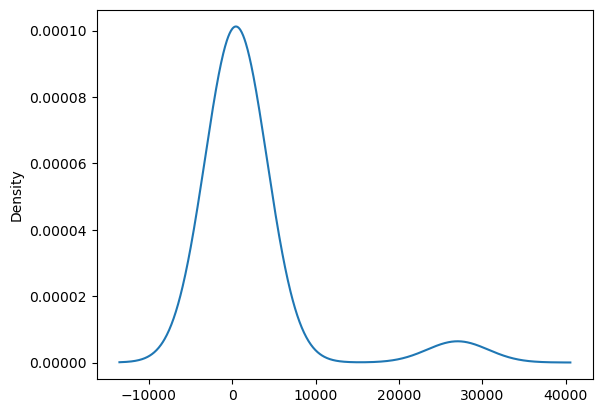

In [176]:
# Visualize the value counts of APPLICATION_TYPE
app_type.plot.density()

In [177]:
# Determine which values to replace if counts are less than ...?
replace_application = app_type[app_type < 500].index.tolist()

# Replace in dataframe
for app_type in replace_application:
    app_features_df['APPLICATION_TYPE'] = app_features_df['APPLICATION_TYPE'].replace(app_type,"Other")
    
# Check to make sure binning was successful
app_features_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [178]:
# Look at CLASSIFICATION value counts for binning
classification = app_features_df['CLASSIFICATION'].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

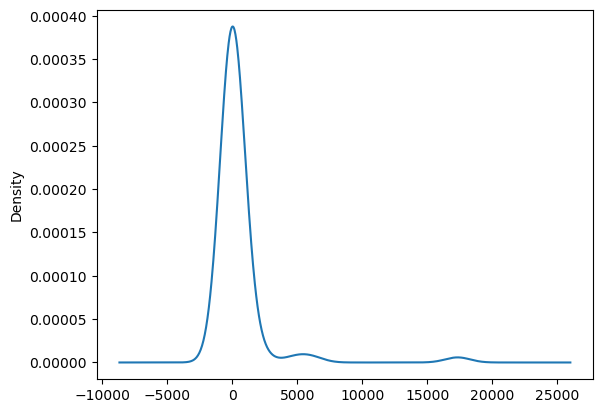

In [179]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density()

In [180]:
# Determine which values to replace if counts are less than ..?
replace_class = classification[classification < 1500].index.tolist()

# Replace in dataframe
for cls in replace_class:
    app_features_df['CLASSIFICATION'] = app_features_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app_features_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [181]:
# Let's explore the rest of our features
for feature in app_features_df.columns:
    print(feature)
    print(app_features_df[feature].value_counts())
    print("---------------------------")

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
---------------------------
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
---------------------------
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64
---------------------------
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
---------------------------
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
---------------------------
STATUS
1    34294
0        5
Name: STATUS, d

In [182]:
# It appears that the STATUS and SPECIAL_CONSIDERATIONS columns are so highly skewed they might as well be dropped
app_features_df = app_features_df.drop(columns=['STATUS', 'SPECIAL_CONSIDERATIONS'])
print(app_features_df.shape)
app_features_df.head()

(34299, 8)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [183]:
# We can bin the rare values in AFFILIATION
replace_affiliation = ['Family/Parent', 'National', 'Regional']

# Replace in dataframe
for affiliation in replace_affiliation:
    app_features_df['AFFILIATION'] = app_features_df['AFFILIATION'].replace(affiliation,"Other")
    
# Check to make sure binning was successful
app_features_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [184]:
# We can bin the rare values in USE_CASE
replace_case = ['CommunityServ', 'Heathcare']

# Replace in dataframe
for case in replace_case:
    app_features_df['USE_CASE'] = app_features_df['USE_CASE'].replace(case,"Other")
    
# Check to make sure binning was successful
app_features_df['USE_CASE'].value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [185]:
# We can bin the rare values in ORGANIZATION
replace_org = ['Co-operative', 'Corporation']

# Replace in dataframe
for org in replace_org:
    app_features_df['ORGANIZATION'] = app_features_df['ORGANIZATION'].replace(org,"Co-op/Corp")
    
# Check to make sure binning was successful
app_features_df['ORGANIZATION'].value_counts()

Trust          23515
Association    10255
Co-op/Corp       529
Name: ORGANIZATION, dtype: int64

In [186]:
# Re-bin the low and high incomes in INCOME_AMT
low_income = ['0', '1-9999', '10000-24999']
high_income = ['1M-5M', '5M-10M', '10M-50M', '50M+']

# Replace in dataframe
for income in low_income:
    app_features_df['INCOME_AMT'] = app_features_df['INCOME_AMT'].replace(income,"0-24999")
for income in high_income:
    app_features_df['INCOME_AMT'] = app_features_df['INCOME_AMT'].replace(income,"1M-50M+")
    
# Check to make sure binning was successful
app_features_df['INCOME_AMT'].value_counts()

0-24999          25659
25000-99999       3747
100000-499999     3374
1M-50M+           1519
Name: INCOME_AMT, dtype: int64

In [187]:
# Looking at the ASK_AMT feature, there's a large spread, likely with outliers
# The min value is 5000
# The median value is 5000
# The max value is 8597806340
app_features_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [188]:
# Let's bin these values into three categories
bins = [0, 5000, 1000000, app_features_df['ASK_AMT'].max()]
binned_ASK_AMT = pd.cut(app_features_df['ASK_AMT'], bins, labels=['low_ASK', 'mid_ASK', 'high_ASK'])
binned_ASK_AMT.value_counts()

low_ASK     25398
mid_ASK      7324
high_ASK     1577
Name: ASK_AMT, dtype: int64

In [189]:
# Add the binned_ASK_AMT and drop ASK_AMT
app_features_df['Binned_ASK_AMT'] = binned_ASK_AMT
app_features_df = app_features_df.drop(columns='ASK_AMT')

In [190]:
# Generate our categorical variable lists
application_cat = app_features_df.dtypes[(app_features_df.dtypes == 'object') |
                                        (app_features_df.dtypes == 'category')].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'Binned_ASK_AMT']

In [191]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_features_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Association,ORGANIZATION_Co-op/Corp,ORGANIZATION_Trust,INCOME_AMT_0-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-50M+,INCOME_AMT_25000-99999,Binned_ASK_AMT_high_ASK,Binned_ASK_AMT_low_ASK,Binned_ASK_AMT_mid_ASK
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [192]:
# Merge one-hot encoded features and drop the originals
app_full_df = app_features_df.merge(encode_df,left_index=True, right_index=True)
app_full_df = app_full_df.drop(labels=application_cat, axis=1)
app_full_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Association,ORGANIZATION_Co-op/Corp,ORGANIZATION_Trust,INCOME_AMT_0-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-50M+,INCOME_AMT_25000-99999,Binned_ASK_AMT_high_ASK,Binned_ASK_AMT_low_ASK,Binned_ASK_AMT_mid_ASK
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [193]:
# Split our preprocessed data into our features and target arrays
y = app_full_df['IS_SUCCESSFUL']
X = app_full_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [222]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create Model

In [234]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = X_train.shape[1]
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_input_features, activation='tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 20)                640       
                                                                 
 dense_62 (Dense)            (None, 20)                420       
                                                                 
 dense_63 (Dense)            (None, 20)                420       
                                                                 
 dense_64 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [235]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [236]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights_optimized.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=804*5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.5733 - accuracy: 0.7203
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7279
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7306
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7311
Epoch 5/200
767/804 [===========================>..] - ETA: 0s - loss: 0.5511 - accuracy: 0.7308
Epoch 5: saving model to checkpoints\weights_optimized.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7315
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7309
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7327
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7332
Epoch 9/200
804/804 [=======================

804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7395
Epoch 64/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7398
Epoch 65/200
779/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7394
Epoch 65: saving model to checkpoints\weights_optimized.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7392
Epoch 66/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7398
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7395
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7402
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7408
Epoch 70/200
779/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7395
Epoch 70: saving model to checkpoints\weights_optimi

779/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7418
Epoch 125: saving model to checkpoints\weights_optimized.125.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7414
Epoch 126/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7397
Epoch 127/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7407
Epoch 128/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7409
Epoch 129/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7405
Epoch 130/200
796/804 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7411
Epoch 130: saving model to checkpoints\weights_optimized.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7410
Epoch 131/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy

Epoch 186/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7421
Epoch 187/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7423
Epoch 188/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7419
Epoch 189/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7413
Epoch 190/200
799/804 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7404
Epoch 190: saving model to checkpoints\weights_optimized.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7409
Epoch 191/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7423
Epoch 192/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7422
Epoch 193/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7424
Epoch 194/200
804/804 [==

In [237]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5610 - accuracy: 0.7222 - 357ms/epoch - 1ms/step
Loss: 0.5610263347625732, Accuracy: 0.7222157716751099


<AxesSubplot:>

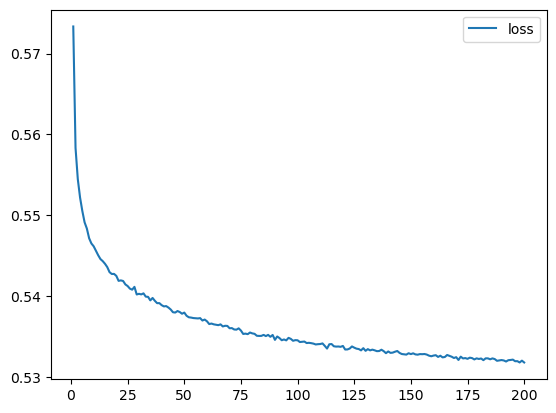

In [238]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

history_df.plot(y='loss')

<AxesSubplot:>

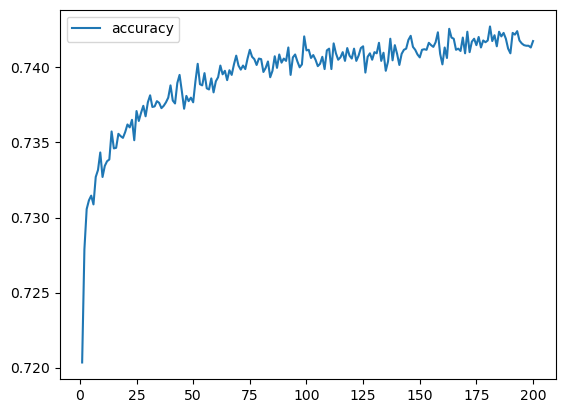

In [239]:
# Plot accuracy
history_df.plot(y='accuracy')

In [240]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

## Model Accuracy Notes

As you can see in the summary this is sequential model 18, so I gave it many tries, but could never get to 75% or more accuracy. 

Things I tried:

    - I dropped two columns that only had two classes with one of those classes having less than 30 values.
    - I tried binning the rare occurences of some of the other columns into an Other category.
    - I also tried re-binning the Income Amount column to a smaller number of groups that were closer in counts.
    - The numerical Ask Amount column was highly skewed right, so I binned it into three groups.
    - In an earlier run I tried adding more neurons to the hidden layers to no avail.
    - A third hidden layer was added (and there were iterations without it).
    - Tanh was used in place of Relu (though both were tried several times). 
    - Finally, I increased the number of epochs from 100 to 200, but the model had effectively converged anyways. 